***Carga de Datos***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
folder_path = '/content/drive/MyDrive/TransformacionDigital/db_bienestar_estudiantil.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TransformacionDigital/db_bienestar_estudiantil.csv', sep=';', encoding='utf-8-sig')

***Observación y Transformación de Datos***

In [ ]:
df.head()

,Género,Edad,Presión académica,Satisfacción con estudios,Horas de sueño,Hábitos alimenticios,Pensamientos de abandono,Horas de estudio,Estrés financiero,Participó en programa BE
0,1,33,5,2,0,2,1,3,1,1
1,0,24,2,5,0,0,0,3,2,0
2,1,31,3,5,2,2,0,9,1,0
3,0,28,3,2,1,0,1,4,5,1
4,0,25,4,3,0,0,1,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27828 entries, 0 to 27827
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Género                     27828 non-null  object 
 1   Edad                       27828 non-null  float64
 2   Presión académica          27828 non-null  float64
 3   Satisfacción con estudios  27828 non-null  float64
 4   Horas de sueño             27828 non-null  object 
 5   Hábitos alimenticios       27828 non-null  object 
 6   Pensamientos de abandono   27828 non-null  object 
 7   Horas de estudio           27828 non-null  float64
 8   Estrés financiero          27828 non-null  float64
 9   Participó en programa BE   27828 non-null  int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
#Transformación de decimales a enteros:
columnas_int = ['Edad', 'Presión académica', 'Satisfacción con estudios', 'Horas de estudio', 'Estrés financiero']

for col in columnas_int:
    df[col] = df[col].astype(int)

In [ ]:
# Cambiar datos object a enteros y mapearlos
mappings = {}

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

print(mappings)

{'Género': {'Femenino': np.int64(0), 'Masculino': np.int64(1)}, 'Horas de sueño': {'5-6 horas': np.int64(0), '7-8 horas': np.int64(1), 'menos de 5 horas': np.int64(2), 'más de 8 horas': np.int64(3)}, 'Hábitos alimenticios': {'Moderado': np.int64(0), 'No Saludable': np.int64(1), 'Saludable': np.int64(2)}, 'Pensamientos de abandono': {'No': np.int64(0), 'Sí': np.int64(1)}}


In [ ]:
# Crear diccionarios invertidos
inverse_mappings = {col: {v:k for k,v in mapping.items()} for col, mapping in mappings.items()}

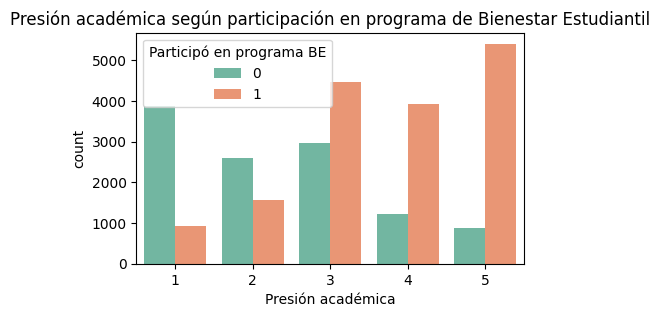

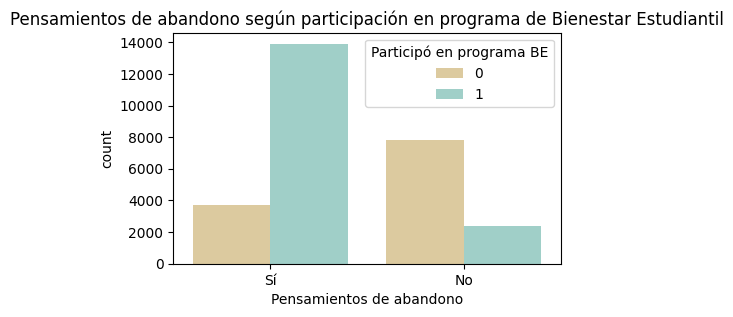

In [ ]:
# Gráficos de observación

plt.figure(figsize=(5,3))
sns.countplot(
    x=df['Presión académica'],
    hue=df['Participó en programa BE'],
    palette='Set2'
)
plt.title('Presión académica según participación en programa de Bienestar Estudiantil')
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(
    x=df['Pensamientos de abandono'].map(inverse_mappings['Pensamientos de abandono']),
    hue=df['Participó en programa BE'],
    palette='BrBG'
)
plt.title('Pensamientos de abandono según participación en programa de Bienestar Estudiantil')
plt.show()

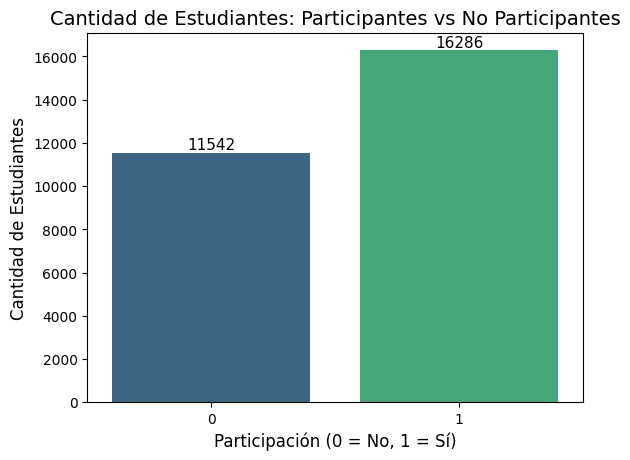

In [ ]:
ax = sns.countplot(x='Participó en programa BE', hue='Participó en programa BE', data=df, palette='viridis', legend=False)
plt.title('Cantidad de Estudiantes: Participantes vs No Participantes', fontsize=14)
plt.xlabel('Participación (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black')

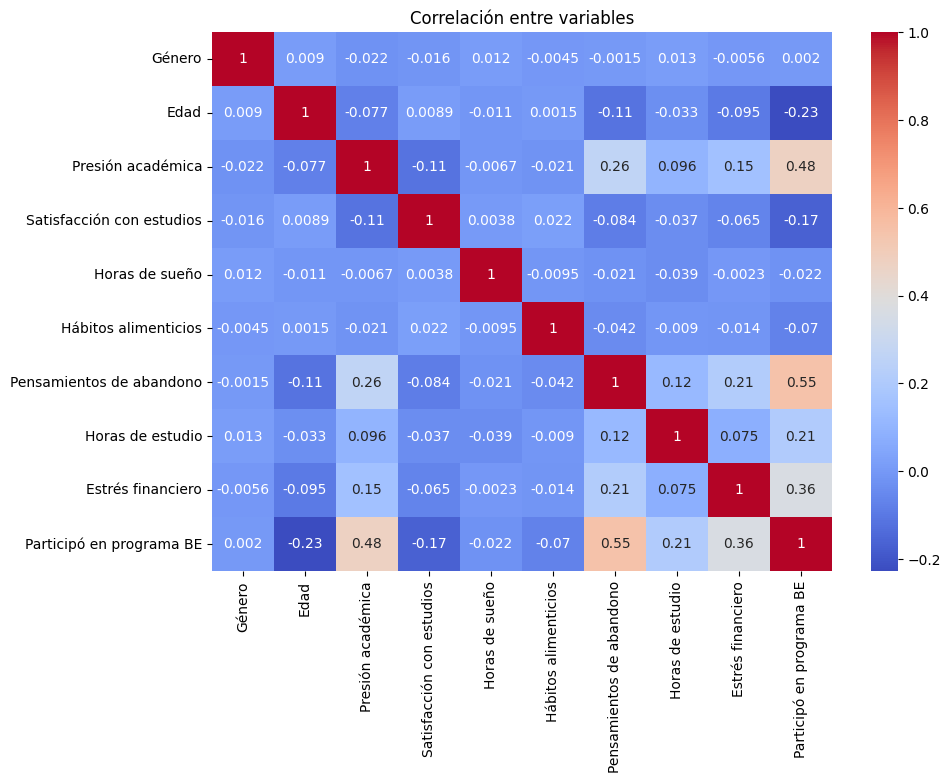

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

***Entrenamiento con Random Forest***

In [ ]:
# --- Separar variables ---
X = df.drop('Participó en programa BE', axis=1)
y = df['Participó en programa BE']

# Dividir el dataset en datos de entrenamiento (80%) y prueba (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Entrenamiento supervisado con Random Forest ---
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)


 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      2299
           1       0.85      0.86      0.86      3267

    accuracy                           0.83      5566
   macro avg       0.83      0.82      0.82      5566
weighted avg       0.83      0.83      0.83      5566



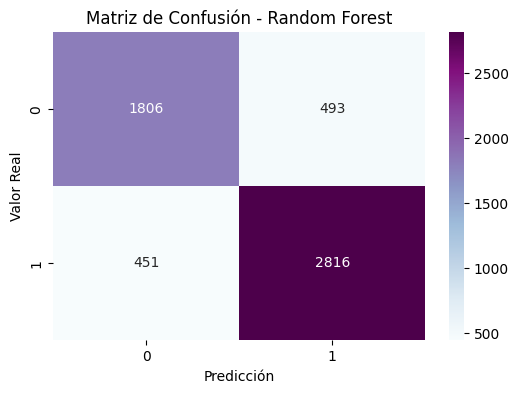

In [ ]:
y_pred = rf_model.predict(X_test)

print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))


# Matriz de confusión para evaluar los errores del modelo
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='BuPu')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

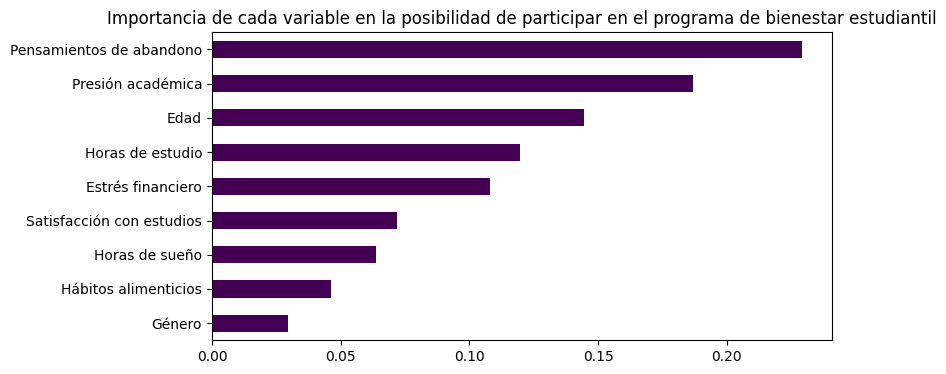

In [ ]:
# Importancia de variables
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,4))
importances.sort_values().plot(kind='barh', colormap='viridis')
plt.title('Importancia de cada variable en la posibilidad de participar en el programa de bienestar estudiantil')
plt.show()


In [ ]:
#Entrenamiento Final

rf_model_final = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model_final.fit(X, y)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
import joblib

# Guardamos el modelo entrenado
joblib.dump(rf_model_final, 'modelo_bienestar.joblib', compress=3)

['modelo_bienestar.joblib']

In [ ]:
#Clasificación de Nivel
def clasificar_nivel(prob_pct):
    if prob_pct < 33:
        return "Bajo"
    elif prob_pct < 66:
        return "Medio"
    else:
        return "Alto"

***Aplicar predicciones a nuevos datos***

In [ ]:
# Cargar la nueva base
nuevos_datos = pd.read_csv('/content/drive/MyDrive/TransformacionDigital/nuevos_estudiantes.csv', sep=';', encoding='utf-8-sig')

In [ ]:
nuevos_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Género                     500 non-null    int64
 1   Edad                       500 non-null    int64
 2   Presión académica          500 non-null    int64
 3   Satisfacción con estudios  500 non-null    int64
 4   Horas de sueño             500 non-null    int64
 5   Hábitos alimenticios       500 non-null    int64
 6   Pensamientos de abandono   500 non-null    int64
 7   Horas de estudio           500 non-null    int64
 8   Estrés financiero          500 non-null    int64
dtypes: int64(9)
memory usage: 35.3 KB


In [ ]:
# Si hay columnas categóricas, aplicar los mismos mapeos
for col, mapping in mappings.items():
    if col in nuevos_datos.columns:
        nuevos_datos[col] = nuevos_datos[col].map(mapping)

In [ ]:
# Clasificar con el modelo entrenado
prob_pct = (rf_model_final.predict_proba(nuevos_datos)[:, 1] * 100).round(2)
nuevos_datos['Probabilidad_%'] = prob_pct
nuevos_datos['Posibilidad'] = nuevos_datos['Probabilidad_%'].apply(clasificar_nivel)


In [ ]:
display(nuevos_datos.head())

,Género,Edad,Presión académica,Satisfacción con estudios,Horas de sueño,Hábitos alimenticios,Pensamientos de abandono,Horas de estudio,Estrés financiero,Probabilidad_%,Posibilidad
0,0,22,2,4,3,2,1,11,4,69.0,Alto
1,1,33,4,3,0,2,1,4,2,33.5,Medio
2,1,19,3,2,3,1,1,5,3,84.0,Alto
3,0,28,5,5,2,1,0,0,4,38.5,Medio
4,1,28,2,2,0,1,0,1,1,2.5,Bajo


In [ ]:
# Exportar
nuevos_datos.to_csv('/content/drive/My Drive/TransformacionDigital/datos_prediccion.csv', index=False)